<a href="https://colab.research.google.com/github/Rachhh53/Digit-Recognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [36]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

In [2]:
!wget https://github.com/Rachhh53/Digit-Recognizer/archive/refs/heads/main.zip

--2022-02-13 18:33:32--  https://github.com/Rachhh53/Digit-Recognizer/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Rachhh53/Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-13 18:33:32--  https://codeload.github.com/Rachhh53/Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip.1’

main.zip.1              [   <=>              ]  15.25M  20.4MB/s    in 0.7s    

2022-02-13 18:33:33 (20.4 MB/s) - ‘main.zip.1’ saved [15996480]



In [3]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
58caa67e03c10c1cc9ea82c172aa37ff7d41b295
replace /content/output_folder/Digit-Recognizer-main/DigitRecognizer.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
!unzip "/content/output_folder/Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/test.csv.zip
replace /content/output_folder/Digit-Recognizer-main/csvs/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
!unzip "/content/output_folder/Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/train.csv.zip
replace /content/output_folder/Digit-Recognizer-main/csvs/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
df_test = pd.read_csv('/content/output_folder/Digit-Recognizer-main/csvs/test.csv')

In [7]:
df_train = pd.read_csv('/content/output_folder/Digit-Recognizer-main/csvs/train.csv')

In [8]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
for col in df_test.columns:
  print(col)

pixel0
pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel12
pixel13
pixel14
pixel15
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel32
pixel33
pixel34
pixel35
pixel36
pixel37
pixel38
pixel39
pixel40
pixel41
pixel42
pixel43
pixel44
pixel45
pixel46
pixel47
pixel48
pixel49
pixel50
pixel51
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel58
pixel59
pixel60
pixel61
pixel62
pixel63
pixel64
pixel65
pixel66
pixel67
pixel68
pixel69
pixel70
pixel71
pixel72
pixel73
pixel74
pixel75
pixel76
pixel77
pixel78
pixel79
pixel80
pixel81
pixel82
pixel83
pixel84
pixel85
pixel86
pixel87
pixel88
pixel89
pixel90
pixel91
pixel92
pixel93
pixel94
pixel95
pixel96
pixel97
pixel98
pixel99
pixel100
pixel101
pixel102
pixel103
pixel104
pixel105
pixel106
pixel107
pixel108
pixel109
pixel110
pixel111
pixel112
pixel113
pixel114
pixel115
pixel116
pixel117
pixel118
pixel119
pixel120
pixel121
pixel122
pix

# EDA

## Random Forest Classifier

Requirement 1 - Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).

In [11]:
y = df_train['label']
X = df_train.drop(['label'], axis=1)

In [12]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
rfc_y_pred=rfc.predict(df_test)

Requirement 2 - Record the time it takes to fit the model and then evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID

Model completed in 32 seconds

Submission:

In [ ]:
# ImageId is not in the dataset so I used a 1 index
output = pd.DataFrame({'ImageId': (df_test.index + 1),
                       'Label': rfc_y_pred})
output.to_csv('submission1.csv', index=False)
files.download('submission1.csv')

Score: 0.96592

An alternative to the above <br>
https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/

Input Shape: (28140, 784)
Accuracy: 96.06%

[[1317    0    2    0    2    1    6    0    5    0]
 [   0 1500    5    3    1    3    4    2    1    1]
 [   5    5 1348    8   15    1    7   13   11    1]
 [   4    3   15 1378    1   26    3   14   15   12]
 [   3    0    2    0 1312    0    8    3    2   28]
 [   6    1    2   15    1 1147   10    2   10   11]
 [   9    2    2    0    5   10 1364    0    5    0]
 [   1    8   19    3    9    0    0 1409    3   28]
 [   3    7    5   12    6    8    8    3 1269   13]
 [   7    3    3   22   15    3    2   13   10 1270]]


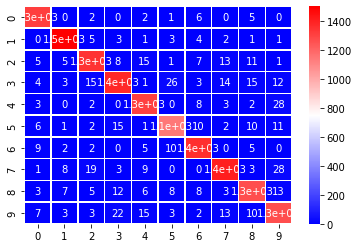

In [32]:
def fit_random_forest_classifier(X, y, print_output=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.33, 
                                                        random_state=42)

    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    acc = accuracy_score(y_test, y_preds)
    
    if print_output == True:
        mat = confusion_matrix(y_test, y_preds)
        sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5)

        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:2.2%}\n'.format(acc))
        print(mat)
    
    return acc
fit_random_forest_classifier(X, y);

## PCA

Requirement 3 - Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.

In [14]:
# create a single dataframe
dataframes = [df_train, df_test]
df = pd.concat(dataframes)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df.shape

(70000, 785)

In [16]:
df_test.shape

(28000, 784)

In [17]:
df_train.shape

(42000, 785)

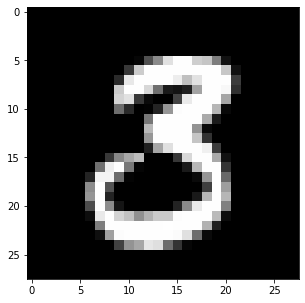

9307    3.0
9307    NaN
Name: label, dtype: float64


In [18]:
# extracting label from dataset
label = df['label']
df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 20000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/

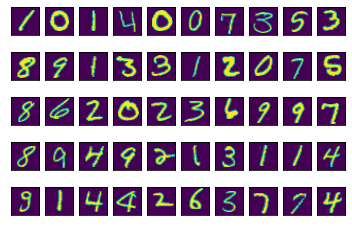

In [23]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

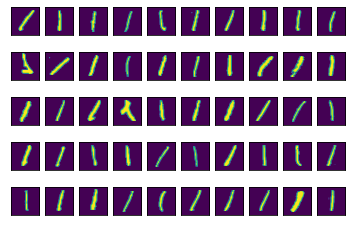

In [24]:
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50): 
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X.iloc[indices[0][digit_num]].values.reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit(1)

Standardize the data

In [19]:
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape

(70000, 784)

In [27]:
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

Try 2 principal components first

Input Shape: (28140, 2)
Accuracy: 32.53%

[[ 822    0  187   53   29   47  136    7   43    9]
 [   1 1282    4   16   24   33   23   50   37   50]
 [ 234    5  304  197  139  109  205   58  105   58]
 [  72   26  207  217  145  178  179  141  176  130]
 [  44   62  127  167  218  115  130  163  121  211]
 [  61   22  142  131  141  239  184   44  183   58]
 [ 204   33  207  154  108  201  290   32  131   37]
 [   7   80   63  110  176   69   37  534   75  329]
 [  55   54  118  169  148  214  166   80  224  106]
 [  16  113   61  102  202   59   50  296   71  378]]


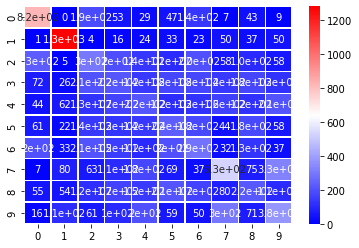

In [33]:
pca, X_pca = do_pca(2, X)
fit_random_forest_classifier(X_pca, y);

2 principal components is not enough - accuracy less than 33%

plot the data in a 2 dimensional space to view separation.

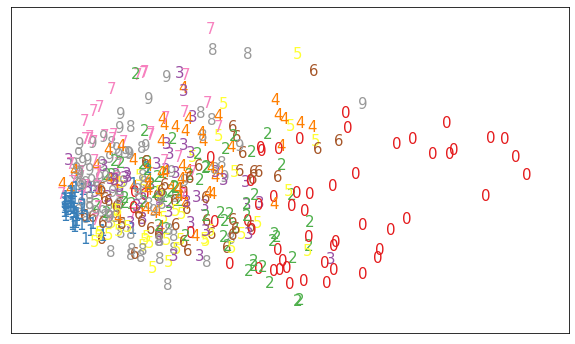

In [34]:
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
plot_components(X_pca[:500], y[:500])

How many principal components would be required in order to reach a reasonable accuracy?

In [35]:
acc_list, pc_list = [], []
for pc in range(2,101):
    print(pc)
    pca, X_pca = do_pca(pc, X)
    acc = fit_random_forest_classifier(X_pca, y, print_output=False);
    acc_list.append(acc)
    pc_list.append(pc)

This took 48 minutes to complete

Requirement 4 - Record the time it takes to identify the principal components.

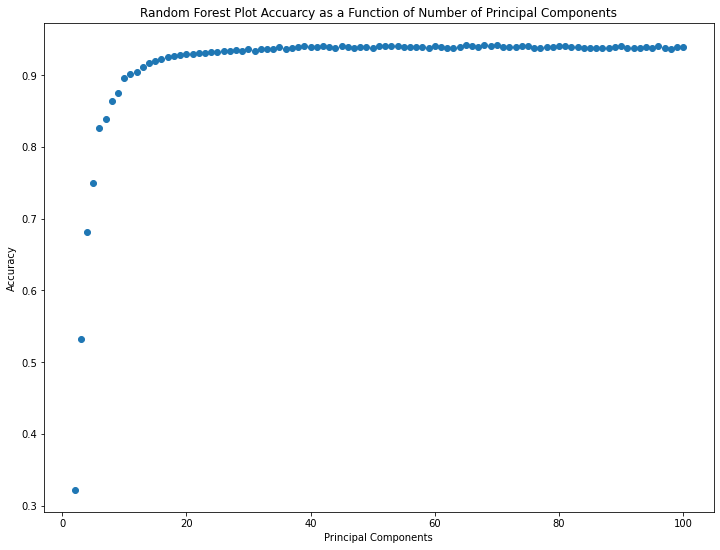

In [37]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Random Forest Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

It looks like the elbow is right around 20 principal components so anything above that would have diminishing returns.

In [38]:
np.max(acc_list), pc_list[np.where(acc_list == np.max(acc_list))[0][0]]

(0.9422077922077922, 65)

Maximum accuracy is 94.2% with 65 principal components.

Requirement 5 - Using the identified principal components from step (2), use thecsvto build another random forest classifier.

In [56]:
# fit PCA with 15 components
pca, X_pca = do_pca(15, X)

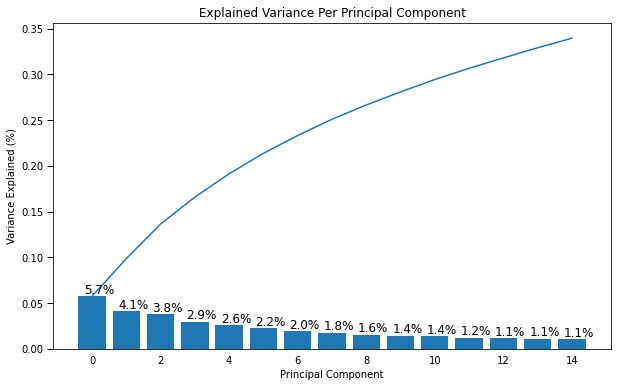

In [57]:
# plots the amount of variance explained by each component.
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

Each bar represents the variability explained by each principal component. <br>
Note: the first component will ALWAYS have the most amount of variability explained<br>
By reviewing only the top 15 components - those alone explain 34% of the variance.

Looking at the shape of components shows us that each component gives the weights for each pixel:

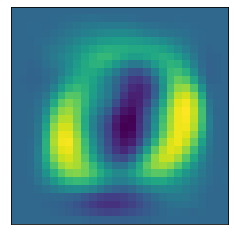

In [58]:
# what pixel patterns are most important to predicting a given number. The bright yellow pixels are heavily weighted and the darker blue pixels are lighter weight.
def plot_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
plot_component(pca, 0)

# Modelling

## Random Forest with PCA

Requirement 6 - Record the time it takes to fit the model and to evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

****Question: should I be training the original test and train sets like this - we were told to do analysis on combined dataset, but we wouldn't train on that dataset because that adds bias, but it seems like doing the PCA analysis that way doesn't really pan out once you don't show all the observations to the model...

In [76]:
y = df_train['label']
X = df_train.drop(['label'], axis=1)

Input Shape: (28140, 65)
Accuracy: 93.90%

[[1303    0    4    2    1    5   14    1    3    0]
 [   0 1494    9    2    1    1    8    1    3    1]
 [  11    1 1335   17    8    0    6    9   23    4]
 [   4    2   23 1346    2   27    2   22   34    9]
 [   1    5   13    1 1280    2    8    4    6   38]
 [  14    2    6   46    3 1083   23    4   11   13]
 [  13    1    2    0    5   15 1355    0    6    0]
 [   2   12   19    8   13    0    0 1378    2   46]
 [   5    8   11   43    8   15    7    4 1219   14]
 [  11    1    8   23   31    2    0   40   10 1222]]


0.939033189033189

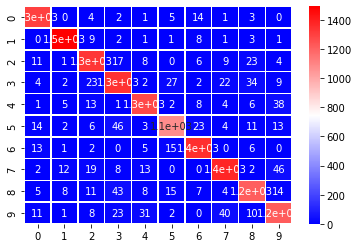

In [77]:
# pca with 65 components
pca, X_pca = do_pca(65, X)
fit_random_forest_classifier(X_pca, y)

In [78]:
pca_test, X_pca_test = do_pca(65, df_test)

In [80]:
rfc2=RandomForestClassifier(n_estimators=100)
rfc2.fit(X_pca,y)
rfc_y_pred2=rfc2.predict(X_pca_test)

In [81]:
# ImageId is not in the dataset so I used a 1 index
output = pd.DataFrame({'ImageId': (df_test.index + 1),
                       'Label': rfc_y_pred2})
output.to_csv('submission2.csv', index=False)
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Score: 0.79867

## KMeans Clustering

Requirement 7 - Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 

# Conclusions